# Notebook : Image Transformations

# Sommaire <a class="anchor" id="TOC"></a>
* [I)   Importations](#chapter1)
* [II)  Opération](#chapter2)
 
* [Fin](#END)

# I) Importations<a class="anchor" id="chapter1"></a>
* [Sommaire](#TOC)
## 1) Librairies

In [1]:
# A) Importations Librairies
## a) PATH
import sys
import os
## b) IMAGE
import pandas as pd
import scipy  as sc#Deprecated
import imageio
import numpy  as np  # USED
import PIL    as PIL # USED
import matplotlib       as mpl
import matplotlib.image as mpimg
## c) EXCEL
import openpyxl as openpyxl
## d) OTHERS
from tqdm.notebook import tqdm
all_libs = {
    "pandas"     : pd,
    "numpy"      : np,
    "matplotlib" : mpl,
    "PIL"        : PIL,
    "scipy"      : sc,
    "openpyxl"   : openpyxl,
}
for nom,lib in all_libs.items():
    print(f"{nom:-<16} : {lib.__version__}")
    
# B) Importations Fonction
from PIL import Image
from scipy import misc
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import PatternFill
from openpyxl.styles.colors import Color

pandas---------- : 1.4.2
numpy----------- : 1.21.5
matplotlib------ : 3.5.1
PIL------------- : 9.0.1
scipy----------- : 1.9.2
openpyxl-------- : 3.0.9


## 2) Paramètres
* [Sommaire](#TOC)
### A) PATH 

### B) IMAGE

In [41]:
class Pixel:        
    def __init__(self,rgba,a_init=255):
        rgba = [int(val) for val in rgba]
        self.r = rgba[0]
        self.g = rgba[1]
        self.b = rgba[2]
        self.a = rgba[3] if len(rgba)== 4 else a_init
        
        (r,g,b,a) = self.r,self.g,self.b,self.a
        
        self.tab = (r,g,b,a)
        self.dic = {"r":r,"g":g,"b":b,"a":a}
        
    
    def aRGB2hex(self):
        return f"{self.a:02x}{self.r:02x}{self.g:02x}{self.b:02x}"
    def RGB2hex(self):
        return f"{self.r:02x}{self.g:02x}{self.b:02x}"
    
    def rgb_equal(self,OtherPixel):
        return self.RGB2hex()  == OtherPixel.RGB2hex()
    def rgba_equal(self,OtherPixel):
        return self.aRGB2hex() == OtherPixel.aRGB2hex()
    def DicStr(self,rgba_mode=True):
        if rgba_mode:
            return self.dic
        else:
            return {i:j for i,j in self.dic.items() if i!='a'}
    def __str__(self):
        return self.aRGB2hex()
    
def ToPixel(r=0,g=0,b=0,a=0):
    return Pixel([r,g,b,a],a)

def GetInfoImage(image):
    return f"Format : {image.format} | Shape : {image.size} | Mode : {image.mode}"# Hauteur x Largeur x Pixel

def check_existing_color(im_np,pixel,verbose = True):
    list_rgba_color = []
    list_rgb_color  = []
    for hauteur in range(im_np.shape[0]):     # hauteur => row => y
        for largeur in range(im_np.shape[1]): # largeur => col => x
            if im_np.shape[2] == 4:
                r,g,b,a = tuple([im_np[hauteur,largeur,i] for i in range(4)]) 
            else:
                r,g,b = tuple([im_np[hauteur,largeur] for i in range(3)]) 
                a = 255
            pix = ToPixel(r,g,b,a)
            list_rgba_color.append(pix.aRGB2hex)  
            list_rgb_color.append(pix.RGB2hex)

    
    res_rgba = pixel.aRGB2hex() not in list_rgba_color
    res_rgb = pixel.RGB2hex() not in list_rgb_color
    if verbose:
        print(f"{pixel.DicStr(True)} not present : {res_rgba}")
        print(f"{pixel.DicStr(False)} not present : {res_rgb}")
    return (res_rgba,res_rgb)

def Collision2Excel(im_np):
    LEN_CASE = 16
    MID_CASE = int(LEN_CASE/2)

    wb = Workbook()
    ws = wb.active

    for h_case,h_pix in enumerate(tqdm(np.arange(MID_CASE,im_np.shape[0],LEN_CASE)),1):
        for l_case,l_pix in enumerate(np.arange(MID_CASE,im_np.shape[1],LEN_CASE),1):
            pixel_case = Pixel(im_np[h_pix,l_pix,:],a_init=255)
            for i, pix_info in pixel_df.iterrows():
                if pixel_case.rgb_equal(pix_info['Pixel']):
                    ws.cell(row = h_case, column = l_case).value = pix_info['Case']
                    print(f"x",end="")
                else: 
                    print(" ",end="")
        print("\n",end="")
                
    return wb

In [42]:
typ_pix = \
{
    "mur" : ToPixel(r=255),
    "eau" : ToPixel(b=255),
}
typ_case = \
{
    "mur" : ".",
    "eau" : "~",
}

cols = \
{
    "Type":[],
    "Case":[],
    "Pixel":[],
    "Pixel_rgb":[],
    "Pixel_rgba":[]
}

for typ in set(typ_pix.keys()) | set(typ_case.keys()):
    cols["Type"].append(typ)
    cols["Case"].append(typ_case.get(typ))
    cols["Pixel"].append(typ_pix.get(typ))
    cols["Pixel_rgb"].append(typ_pix.get(typ).RGB2hex())
    cols["Pixel_rgba"].append(typ_pix.get(typ).aRGB2hex())

pixel_df = pd.DataFrame(cols)

## II. Opération <a class="anchor" id="chapter2"></a>
* [Sommaire](#TOC)


****************************************************************************************************
C:\Users\bapti\OneDrive\Bureau\Game\ExcelMon/Image/Map/Collision/Villes/bourg-palette.png
C:\Users\bapti\OneDrive\Bureau\Game\ExcelMon/ResultsTransformation/Map/Villes/bourg-palette.xlsx
IMAGE Format : PNG | Shape : (384, 320) | Mode : RGBA


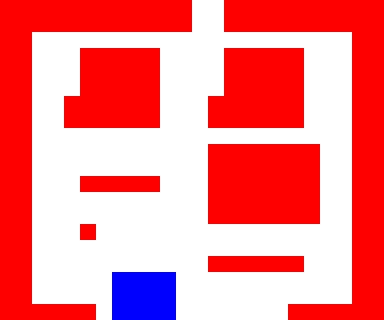

Image Transparence (Values[  0 255]) : 


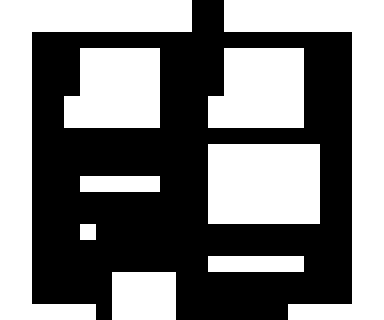

Précense :
mur | RGBA = True | RGB = True
eau | RGBA = True | RGB = True


  0%|          | 0/20 [00:00<?, ?it/s]

x x x x x x x x x x x x     x x x x x x x x x x 
x x x x x x x x x x x x     x x x x x x x x x x 
x x                                         x x 
x x       x x x x x         x x x x x       x x 
x x       x x x x x         x x x x x       x x 
x x       x x x x x         x x x x x       x x 
x x     x x x x x x       x x x x x x       x x 
x x     x x x x x x       x x x x x x       x x 
x x                                         x x 
x x                       x x x x x x x     x x 
x x                       x x x x x x x     x x 
x x       x x x x x       x x x x x x x     x x 
x x                       x x x x x x x     x x 
x x                       x x x x x x x     x x 
x x       x                                 x x 
x x                                         x x 
x x                       x x x x x x       x x 
x x            x x x x                      x x 
x x            x x x x                      x x 
x x x x x x    x x x x              x x x x x x 


In [43]:
THIS_FOLDER = os.path.abspath('.')
FOLDER_EXCEL = "/ResultsTransformation/Map/"
FORMAT_EXCEL = ".xlsx"
FOLDER_IMAGE_PATH = \
{
    "/Image/Map/Collision/Villes/" : 
    [
        "bourg-palette"
    ],
}
FORMAT_IMAGE = ".png"

for FOLDER_IMAGE,NAME_IMAGE_LIST in FOLDER_IMAGE_PATH.items():
    for NAME_IMAGE in NAME_IMAGE_LIST:
        print("\n" + "".join(["*"]*100))
        PATH_IMAGE = THIS_FOLDER + FOLDER_IMAGE + NAME_IMAGE + FORMAT_IMAGE
        TYPE_IMAGE = os.path.basename(os.path.dirname(PATH_IMAGE)) +"/"
        PATH_EXCEL = THIS_FOLDER + FOLDER_EXCEL + TYPE_IMAGE + NAME_IMAGE + FORMAT_EXCEL
        if not os.path.exists(os.path.dirname(PATH_EXCEL)):
            os.makedirs(os.path.dirname(PATH_EXCEL))
        print(PATH_IMAGE)
        print(PATH_EXCEL)
        NAME_EXCEL = NAME_IMAGE
        
        im    = Image.open(PATH_IMAGE)
        im_np = np.asarray(im, dtype=int)

        print(f"IMAGE {GetInfoImage(im)}")# Hauteur x Largeur x Pixel
        display(im)
        if im.mode == "RGBA":
            (r, g, b, a) = im.split()
            print(f"Image Transparence (Values{np.unique(np.asarray(a))}) : ")
            display(a)
        print("Précense :")
        for i,pix_info in pixel_df.iterrows():
            res = check_existing_color(im_np,pix_info["Pixel"],False)
            print(f"{pix_info['Type']} | RGBA = {res[0]} | RGB = {res[1]}")
            
        wb = Collision2Excel(im_np)
        wb.active.title = NAME_EXCEL
        wb.save(PATH_EXCEL)

# END <a class="anchor" id="END"></a>
* [Sommaire](#TOC)